In [2]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [3]:

def loadData(filename):
    data = []
    with open(filename,'rb') as f:
        while True:
            try:
                d = pickle.load(f)
                data.append(d.data)
            except EOFError:
                break
    df = pd.concat(data)
    return df

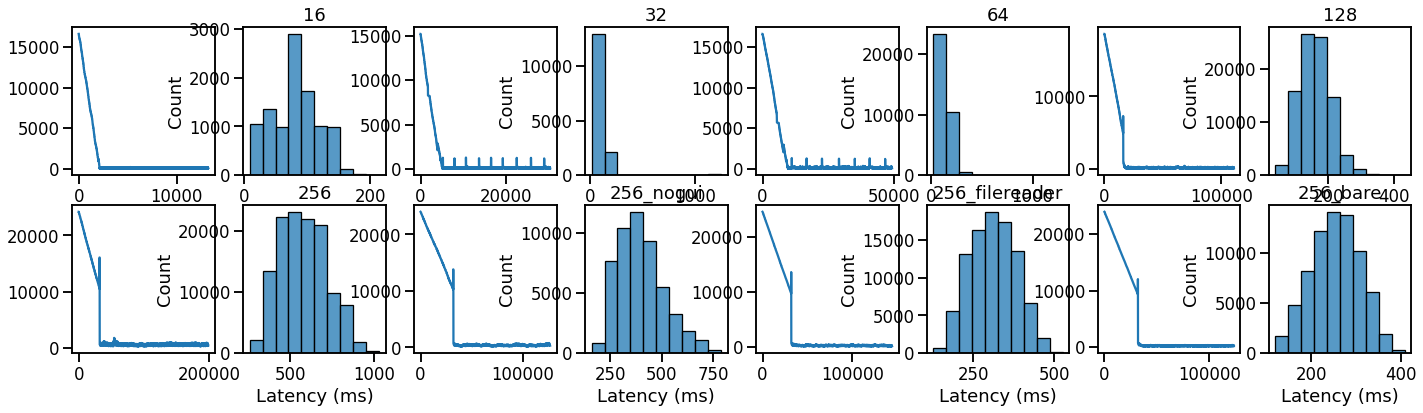

In [96]:
fig,ax = plt.subplots(2,8, figsize=(8*3,3*2))
idx = 0
latencies = []
chnos = []
for chno,start_pt in zip([16,32,64,128,256,'256_nogui','256_filereader','256_bare'],[3000, 15000, 15000, 20000, 75000,75000, 50000,50000]):
    df = loadData(f'../data/df_sort_ch{chno}.pkl')
    df['process_time'] = (df.sort_timestamps - df.acq_timestamps)*1000
    ax.flat[idx].plot(df.process_time.values)
    idx += 1
    df_sel = df.iloc[start_pt:]

    sns.histplot(x='process_time',bins=10, data=df_sel, ax=ax.flat[idx])
    ax.flat[idx].set(xlabel='Latency (ms)', title=f'{chno}')
    idx +=1
    # plt.savefig('figures/latency_ch64.png',dpi=300,bbox_inches='tight')
    lat = df_sel.process_time.mean()

    latencies += df_sel.process_time.values.tolist()
    chnos = chnos + [chno]*len(df_sel)

# fig.tight_layout()

In [99]:
df_lat = pd.DataFrame({'channels':chnos, 'latency': latencies})
df_lat.channels = df_lat.channels.replace({'256_nogui': '256#', '256_filereader': '256*','256_bare':'256*#'})
df_lat

,channels,latency
0,16,44.2357
1,16,44.1619
2,16,155.7061
3,16,155.7040
4,16,155.7017
...,...,...
493765,256*#,215.1933
493766,256*#,215.1922
493767,256*#,215.1911
493768,256*#,215.1899


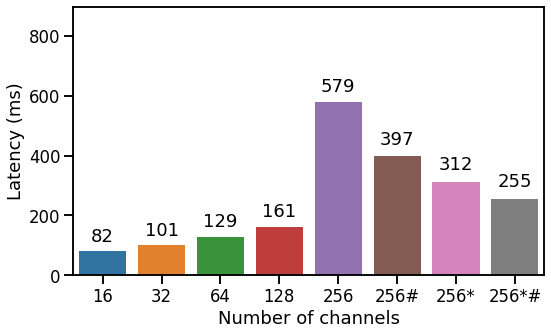

In [100]:
sns.set_context('talk')
plt.figure(figsize=(8,5))
df2plot = df_lat.groupby('channels').mean().reset_index()
ax = sns.barplot(x='channels', y='latency', data=df2plot)
ax.set(xlabel='Number of channels', ylabel='Latency (ms)')

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            ymin,ymax = ax.get_ylim()
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + ymax*0.05
            value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
            ax.set_ylim([ymin, ymax+ymax*0.05])

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)
plt.tight_layout()
plt.savefig('figures/latency_all.png',dpi=300,bbox_inches='tight')

In [33]:
df2plot

,latency
channels,
16,82.335667
32,100.697014
64,129.407333
128,161.475764
256,578.767988


254.51429073644442


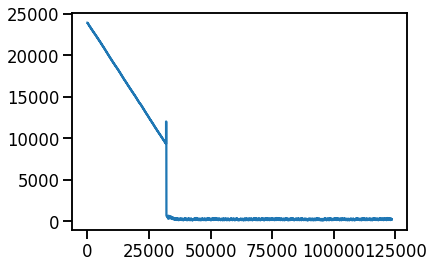

In [94]:
df = loadData(f'../data/df_sort_ch256_bare.pkl')
df['process_time'] = (df.sort_timestamps - df.acq_timestamps)*1000
plt.figure()
plt.plot(df.process_time.values)
print(df.process_time.iloc[50000:].mean())

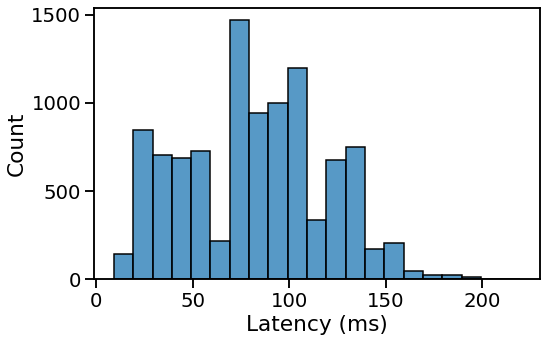

In [101]:
df = loadData(f'../data/df_sort_ch16.pkl')
plt.figure(figsize=(8,5))
df['process_time'] = (df.sort_timestamps - df.acq_timestamps)*1000
df_sel = df.iloc[3000:]
sns.set_context('talk',font_scale=1.2)
ax = sns.histplot(x='process_time',binwidth=10, data=df_sel)
ax.set(xlabel='Latency (ms)')
plt.savefig('figures/latency_ch16.png',dpi=300,bbox_inches='tight')

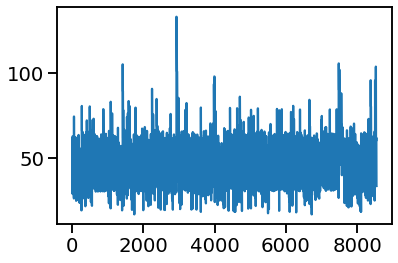

In [8]:
plt.plot(df_sel.process_time.values)